# Visualizing data using pandas and bokeh

In [1]:
import pandas as pd, csv, os, re
import numpy as np
#from nltk.stem.porter import PorterStemmer # an approximate method of stemming words
#stemmer = PorterStemmer()

# FOR VISUALIZATIONS
import matplotlib, seaborn as sns
import matplotlib.pyplot as plt

# Visualization parameters
% pylab inline 
% matplotlib inline
matplotlib.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [2]:
dir_prefix = '/home/jovyan/work/'
counts_file = dir_prefix + 'Charter-school-identities/data/charters_parsed_03-04_no-text_SMALL.csv'
bigfile = dir_prefix + 'Charter-school-identities/data/charters_parsed_03-08.csv'

In [3]:
#tempdf = pd.read_csv(bigfile, iterator="True", sep='\t')
#len(pd.read_csv(bigfile, sep="\t", usecols=["SURVYEAR", "NCESSCH"]))

#print(tempdf.get_chunk(1).keys())
#tempdf.get_chunk(5)[["WEBTEXT", "IDEOLOGY_TEXT", "KEYWORDS_TEXT"]] # There's data here! But how much?

In [4]:
big_keepcols = ['MEMBER', 'FTE', 'YEAR_OPENED', 'AGE', 'YEAR_CLOSED', 'TOTETH', 'PCTETH', 'LEA_NAME', 'STATENAME', 'TOTFRL', 'ALL_RLA00PCTPROF_1415', 'ALL_MTH00PCTPROF_1415', 'LOCALE', 'PLACE', 'SCH_NAME', 'ADDRESS14', 'TITLEI', 'ESS_COUNT', 'PROG_COUNT', 'RIT_COUNT', 'ESS_STRENGTH', 'PROG_STRENGTH', 'WEBTEXT', 'KEYWORDS_TEXT', 'IDEOLOGY_TEXT'] # 'LON1516', 'LAT1516',

In [5]:
def convert_df(df):
    """Makes a Pandas DataFrame more memory-efficient through intelligent use of Pandas data types: 
    specifically, by storing columns with repetitive Python strings not with the object dtype for unique values 
    (entirely stored in memory) but as categoricals, which are represented by repeated integer values. This is a 
    net gain in memory when the reduced memory size of the category type outweighs the added memory cost of storing 
    one more thing. As such, this function checks the degree of redundancy for a given column before converting it.
    
    # TO DO: Filter out non-object columns, make that more efficient by downcasting numeric types using pd.to_numeric(), 
    merge  that with the converted object columns (see https://www.dataquest.io/blog/pandas-big-data/). 
    For now, since the current DF is ENTIRELY composed of object types, code is left as is. 
    But note that the current code will eliminate any non-object type columns."""
    
    converted_df = pd.DataFrame() # Initialize DF for memory-efficient storage of strings (object types)
    df_obj = df.select_dtypes(include=['object']).copy() # Filter to only those columns of object data type

    for col in df.columns: 
        if col in df_obj: 
            num_unique_values = len(df_obj[col].unique())
            num_total_values = len(df_obj[col])
            if (num_unique_values / num_total_values) < 0.5: # Only convert data types if at least half of values are duplicates
                converted_df.loc[:,col] = df[col].astype('category') # Store these columns as dtype "category"
            else: 
                converted_df.loc[:,col] = df[col]
        else:    
            converted_df.loc[:,col] = df[col]
                      
    converted_df.select_dtypes(include=['float']).apply(pd.to_numeric,downcast='float')
    converted_df.select_dtypes(include=['int']).apply(pd.to_numeric,downcast='signed')
    
    return converted_df

In [6]:
schooldf = pd.read_csv(counts_file, sep=",", low_memory=False, encoding="utf-8", na_values={"TITLEI":["M","N"]})
schooldf["PCTFRL"] = schooldf["TOTFRL"]/schooldf["MEMBER"] # Percent receiving free/ reduced-price lunch
schooldf["IDLEAN"] = schooldf["ess_strength"] - schooldf["prog_strength"]
schooldf = convert_df(schooldf)
print(schooldf.keys())
schooldf

Index(['STATENAME', 'LEAID', 'LEA_NAME', 'NCESSCH', 'SCH_NAME', 'TOTFRL',
       'MEMBER', 'TITLEI', 'FTE', 'YEAR_OPENED', 'YEAR_CLOSED', 'LATCODE',
       'LONGCODE', 'LOCALE', 'ALL_MTH00PCTPROF_1415', 'ALL_RLA00PCTPROF_1415',
       'ADDRESS14', 'ess_count', 'prog_count', 'rit_count', 'ess_strength',
       'prog_strength', 'AGE', 'PCTETH', 'PLACE', 'TOTETH', 'PCTFRL',
       'IDLEAN'],
      dtype='object')


,STATENAME,LEAID,LEA_NAME,NCESSCH,SCH_NAME,TOTFRL,MEMBER,TITLEI,FTE,YEAR_OPENED,...,prog_count,rit_count,ess_strength,prog_strength,AGE,PCTETH,PLACE,TOTETH,PCTFRL,IDLEAN
0,ALASKA,200001.0,Lower Kuskokwim School District,2.000010e+10,Ayaprun Elitnaurvik,154.0,177.0,1.0,13.00,1999.0,...,1.0,29.0,0.137931,0.034483,15.0,0.988701,Town,175.0,0.870056,0.103448
1,ALASKA,200150.0,Ketchikan Gateway Borough School District,2.001500e+10,Ketchikan Charter School,75.0,163.0,1.0,12.00,1998.0,...,116.0,1096.0,0.041058,0.105839,16.0,0.687117,Town,112.0,0.460123,-0.064781
2,ALASKA,200150.0,Ketchikan Gateway Borough School District,2.001500e+10,Tongass School of Arts and Sciences Charter Sc...,98.0,183.0,1.0,10.50,2003.0,...,7.0,80.0,0.037500,0.087500,11.0,0.524590,Town,96.0,0.535519,-0.050000
3,ALASKA,200180.0,Anchorage School District,2.001800e+10,Aquarian Charter School,0.0,379.0,2.0,19.80,1998.0,...,85.0,975.0,0.095385,0.087179,16.0,0.269129,City,102.0,0.000000,0.008205
4,ALASKA,200180.0,Anchorage School District,2.001800e+10,Family Partnership Charter School,0.0,541.0,2.0,8.79,1998.0,...,1.0,35.0,0.114286,0.028571,16.0,0.360444,City,195.0,0.000000,0.085714
5,ALASKA,200180.0,Anchorage School District,2.001800e+10,Winterberry School,0.0,267.0,2.0,14.00,2005.0,...,8.0,25.0,0.040000,0.320000,9.0,0.228464,City,61.0,0.000000,-0.280000
6,ALASKA,200180.0,Anchorage School District,2.001800e+10,Eagle Academy Charter School,0.0,177.0,2.0,9.34,2005.0,...,17.0,167.0,0.299401,0.101796,9.0,0.209040,Town,37.0,0.000000,0.197605
7,ALASKA,200180.0,Anchorage School District,2.001800e+10,Frontier Charter School,0.0,267.0,2.0,2.00,2003.0,...,84.0,763.0,0.169069,0.110092,11.0,0.325843,City,87.0,0.000000,0.058978
8,ALASKA,200180.0,Anchorage School District,2.001800e+10,Highland Tech High Charter School,0.0,193.0,2.0,11.00,2003.0,...,60.0,774.0,0.114987,0.077519,11.0,0.466321,City,90.0,0.000000,0.037468
9,ALASKA,200180.0,Anchorage School District,2.001800e+10,Rilke Schule Charter School,58.0,443.0,2.0,24.79,2007.0,...,1.0,35.0,0.114286,0.028571,7.0,0.194131,City,86.0,0.130926,0.085714


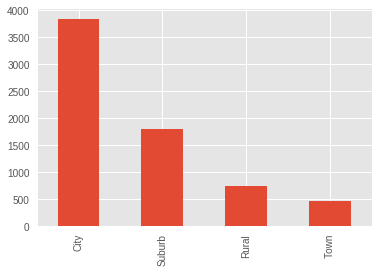

In [7]:
schooldf["PLACE"].value_counts().plot(kind='bar')
plt.show()

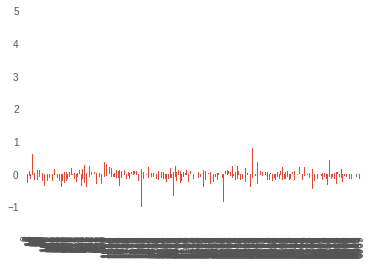

In [ ]:
grouped_place = schooldf.groupby("PLACE")
#grouped_locale.mean().sort_values(by="LOCALE",ascending=False)
grouped_place["IDLEAN"].median().plot(kind='bar')
plt.show()

In [21]:
corr_df = schooldf.drop(['YEAR_CLOSED', 'YEAR_OPENED', 'LATCODE', 'LONGCODE', 'ess_count', 'prog_count', 'rit_count', 'TOTETH', 'LEA_NAME', 'STATENAME', 'ADDRESS14', 'NCESSCH', 'LEAID'], axis=1)
print(corr_df.corr(method='spearman'))

                 TOTFRL    MEMBER    TITLEI       FTE  ess_strength  \
TOTFRL         1.000000  0.668498 -0.433346  0.583055      0.103058   
MEMBER         0.668498  1.000000 -0.090392  0.660596      0.073412   
TITLEI        -0.433346 -0.090392  1.000000 -0.105817     -0.039284   
FTE            0.583055  0.660596 -0.105817  1.000000      0.068535   
ess_strength   0.103058  0.073412 -0.039284  0.068535      1.000000   
prog_strength -0.128964 -0.054222  0.096320 -0.062019      0.065887   
AGE            0.103031  0.195928  0.003819  0.161897     -0.015991   
PCTETH         0.515593  0.137784 -0.403547  0.193420      0.097088   

               prog_strength       AGE    PCTETH  
TOTFRL             -0.128964  0.103031  0.515593  
MEMBER             -0.054222  0.195928  0.137784  
TITLEI              0.096320  0.003819 -0.403547  
FTE                -0.062019  0.161897  0.193420  
ess_strength        0.065887 -0.015991  0.097088  
prog_strength       1.000000 -0.011359 -0.147102  
AGE

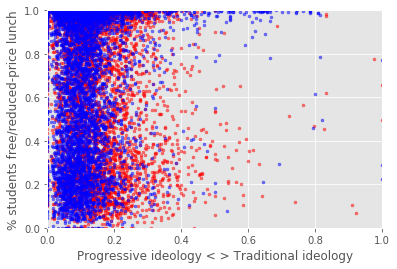

In [85]:
#plt.scatter(schooldf.IDLEAN, schooldf.PCTETH, alpha=0.5, c="purple", marker='.')
plt.scatter(schooldf.prog_strength, schooldf.PCTETH, alpha=0.5, c="red", marker='.') #s=schooldf.MEMBER # label="% students receiving FRPL by school ideology"
plt.scatter(schooldf.ess_strength, schooldf.PCTETH, alpha=0.5, c="blue", marker='.')

#plt.plot(schooldf.prog_strength, schooldf.PCTETH, c="red") #s=schooldf.MEMBER # label="% students receiving FRPL by school ideology"
#plt.plot(schooldf.ess_strength, schooldf.PCTETH, c="blue")

plt.ylim(0.0, 1.0) ; plt.ylabel("% students free/reduced-price lunch")
plt.xlim(0.0, 1.0) ; plt.xlabel("Progressive ideology < > Traditional ideology")

plt.show()

In [86]:
plt.plot(np.unique(schooldf.prog_strength), np.poly1d(np.polyfit(schooldf.prog_strength, schooldf.PCTETH, 1))(np.unique(schooldf.prog_strength)))

ValueError: On entry to DLASCL parameter number 4 had an illegal value

In [ ]:
sns.lmplot(x="prog_strength", y="PCTETH", data=schooldf)

In [ ]:
sns_plot = ...
sns_plot.savefig(dir_prefix + "Charter-school-identities/data/plot_output.png")